In [1]:
import sys
sys.path.append(r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\DATA ANALYSIS')

In [2]:
from UTILS import drive

In [3]:
folder_id = '19ApmRMhBMmQ7gT2i8akhViuKDyhP3QML'

In [4]:
svc = drive.authenticate()

In [5]:
files = drive.list_files_in_folder(svc, folder_id, max_files=5)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

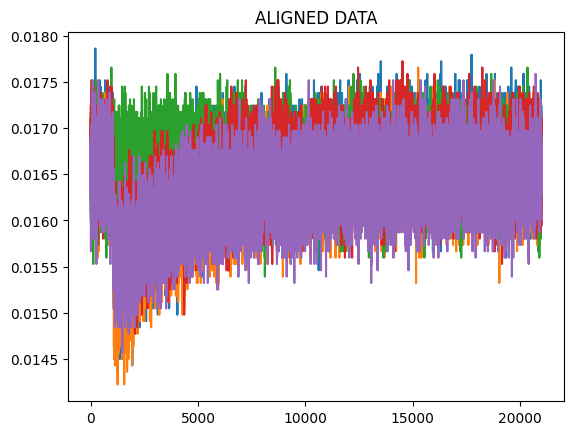

In [7]:
from numpy import float64, ndarray


rms = np.zeros(len(files))

for i,file in enumerate(files):
    compressed_file_io = drive.download_file_from_drive(svc, file['id'])
    # Decompress the HDF5 file and load it into memory
    temp = drive.decompress_hdf5_to_memory(compressed_file_io)
    T = np.linspace(0,len(temp),len(temp))
    plt.plot(T,temp)
    plt.title('ALIGNED DATA')
    len_fit = int(np.floor(len(temp)/10))
    pol_amp = np.polyfit(T[:len_fit], temp[:len_fit], 2)
    rms[i] = np.sqrt(np.mean((np.polyval(pol_amp, T[:len_fit])-temp[:len_fit])**2)) 

Import Noise File

In [8]:
from UTILS.load_data import *
noise_file, service = get_data('1jlqfOxQdq06XjZmWYrYFiQhtDJbilT8f',1)

In [9]:
noise = in_memory(noise_file[0], service)

Download 100%.


In [10]:
from UTILS.OF import OF

In [11]:
# Instantiate the Medium class
medium_processor = OF.Medium()

In [12]:
preStop = 700  #E' il numero di punti della finestra di acquisizione senza il segnale.

bsl = np.mean(temp[0:preStop])
bsl_noise = np.mean(noise)

In [13]:
data = temp - np.array([bsl]).T
noise = noise - np.array([bsl_noise]).T

In [14]:
medium_processor.NPS = np.array(np.abs(min(temp)/rms[i]))

In [15]:
freq, PSD_noise = medium_processor.PSD(noise,len(noise))

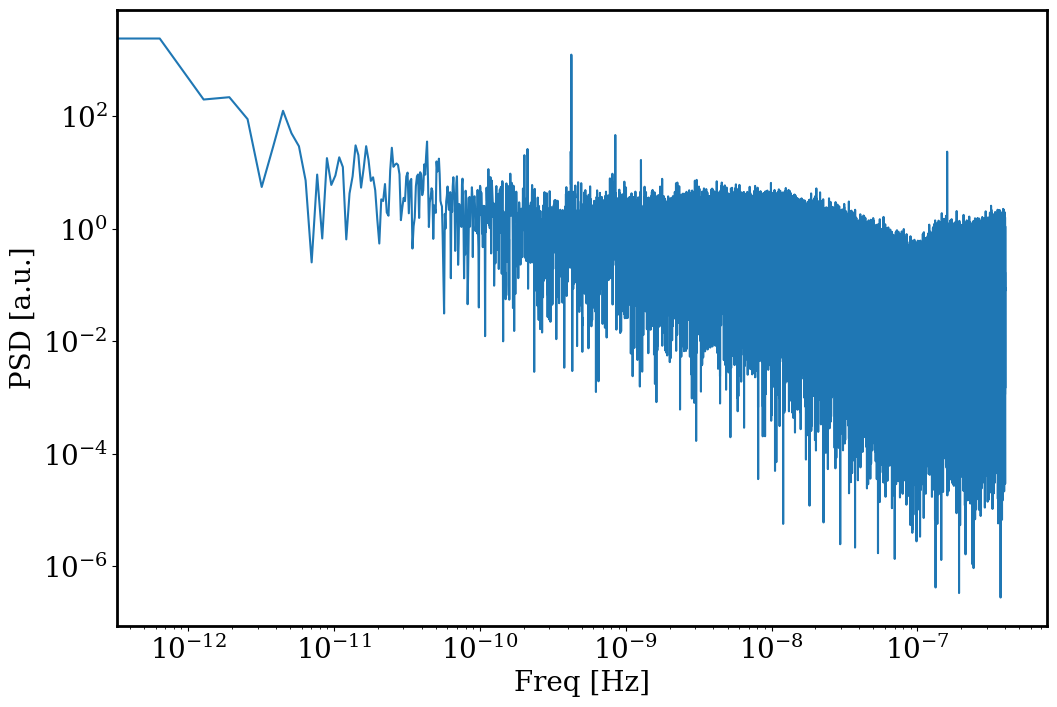

In [16]:
npt = len(PSD_noise)
plt.loglog(freq, PSD_noise)
plt.xlabel("Freq [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

In [21]:
medium_processor.NPS = PSD_noise[:len(temp)]
medium_processor.medium = medium_processor.create_medium(temp,np.zeros(temp.shape[0]))

Text(0, 0.5, 'Medium Signal [V]')

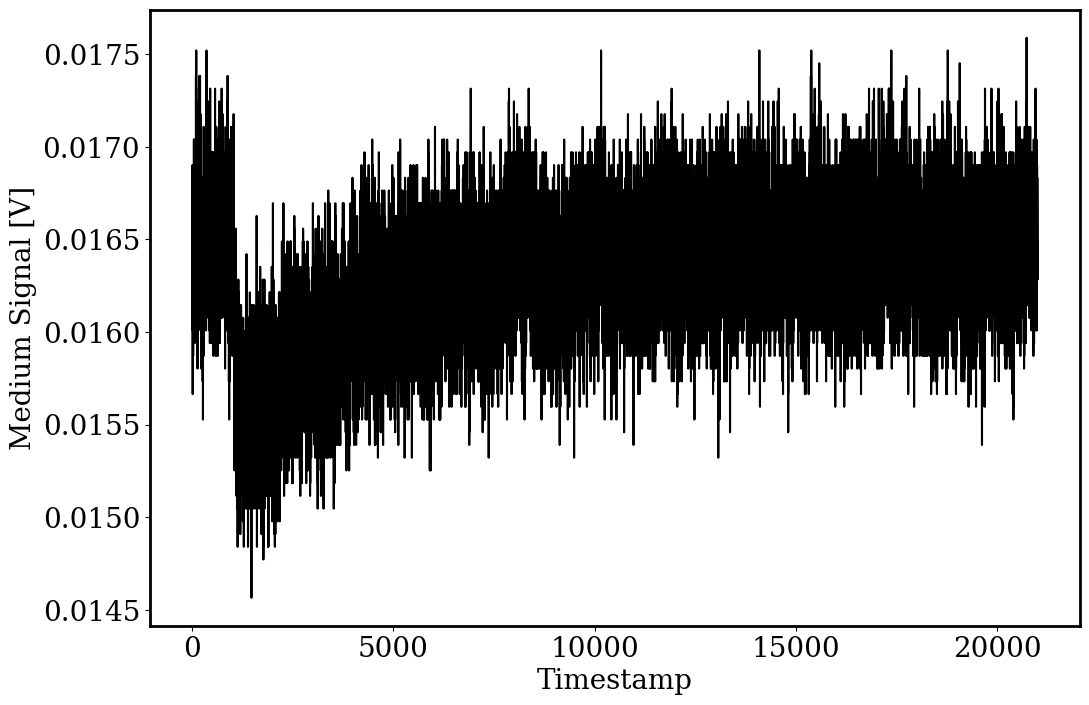

In [22]:
plt.plot(np.linspace(0,len(medium_processor.medium),len(medium_processor.medium)),medium_processor.medium,c='k')
plt.xlabel("Timestamp")
plt.ylabel('Medium Signal [V]')

In [24]:
# Creo il filtro H e lo applico ai dati su cui ho calcolato il medio
H = medium_processor.create_filter()

data_filtered_f = np.fft.fft(temp) * H  
data_filtered_t = np.fft.ifft(data_filtered_f).real
npt = len(data_filtered_t)
data_filtered_t = np.concatenate((data_filtered_t[npt//2:], data_filtered_t[:npt//2]))

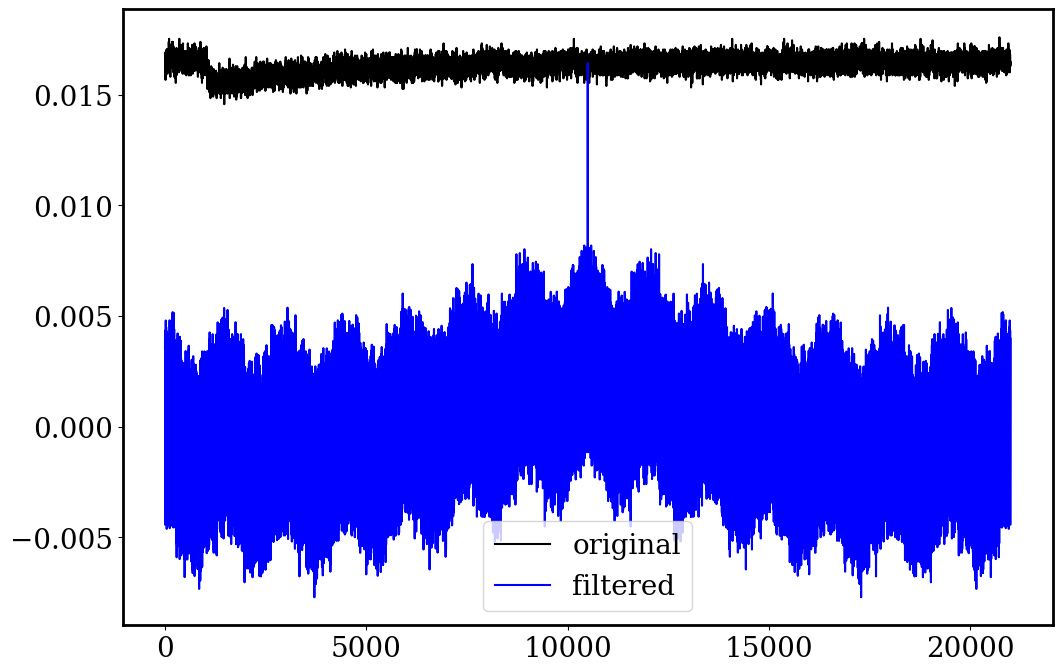

In [25]:
plt.plot(temp,c='k',label="original")
plt.plot(data_filtered_t,label="filtered",c='b')
plt.legend()
plt.show()

In [27]:
OFT, OFF, OFdelay, OFtest, _ = medium_processor.applyOF(temp,H)

In [31]:
print(OFtest)

-1.1963530610614725e-08
